## Assignment:

Choose six recent popular movies. Ask at least five people that you know (friends, family, classmates, imaginary friends) to rate each of these movies that they have seen on a scale of 1 to 5. There should be at least one movie that not everyone has seen!
Take the results (observations) and store them somewhere (like a SQL database, or a .CSV file). Load the information into a pandas dataframe. Your solution should include Python and pandas code that accomplishes the following:
1. Load the ratings by user information that you collected into a pandas dataframe.
2. Show the average ratings for each user and each movie.
3. Create a new pandas dataframe, with normalized ratings for each user. Again, show the average ratings for each user and each movie.
4. Provide a text-based conclusion: explain what might be advantages and disadvantages of using normalized ratings instead of the actual ratings.
5. [Extra credit] Create another new pandas dataframe, with standardized ratings for each user. Once again, show the average ratings for each user and each movie.

In [83]:
# Imports required modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

# Set charts to view inline
%matplotlib inline

In [4]:
# Loads the rating by user into a dataframe.
File = "/Users/macbookair/Movies.csv"
data = pd.read_csv(File)
data

,People,The Nun,Final Score,A Wizard's Tale,Peppermint,The Wife,Slender Man
0,Giselle,4.0,3.0,3.0,4.0,5.0,NaN
1,Trish,3.0,2.0,4.0,NaN,4.0,4.0
2,Tom,4.0,5.0,NaN,4.0,NaN,5.0
3,LeAnna,NaN,NaN,4.0,3.0,5.0,5.0
4,Tracey,2.0,NaN,1.0,4.0,2.0,5.0


In [24]:
df1 = data.append(data.mean(), ignore_index=True) # creates new dataframe and appends the mean row. 
df1.at[5, 'People'] = 'Average' # Renames the cell at this location.
df1 = df1.set_index('People')
df1

,The Nun,Final Score,A Wizard's Tale,Peppermint,The Wife,Slender Man
People,,,,,,
Giselle,4.00,3.000000,3.0,4.00,5.0,NaN
Trish,3.00,2.000000,4.0,NaN,4.0,4.00
Tom,4.00,5.000000,NaN,4.00,NaN,5.00
LeAnna,NaN,NaN,4.0,3.00,5.0,5.00
Tracey,2.00,NaN,1.0,4.00,2.0,5.00
Average,3.25,3.333333,3.0,3.75,4.0,4.75


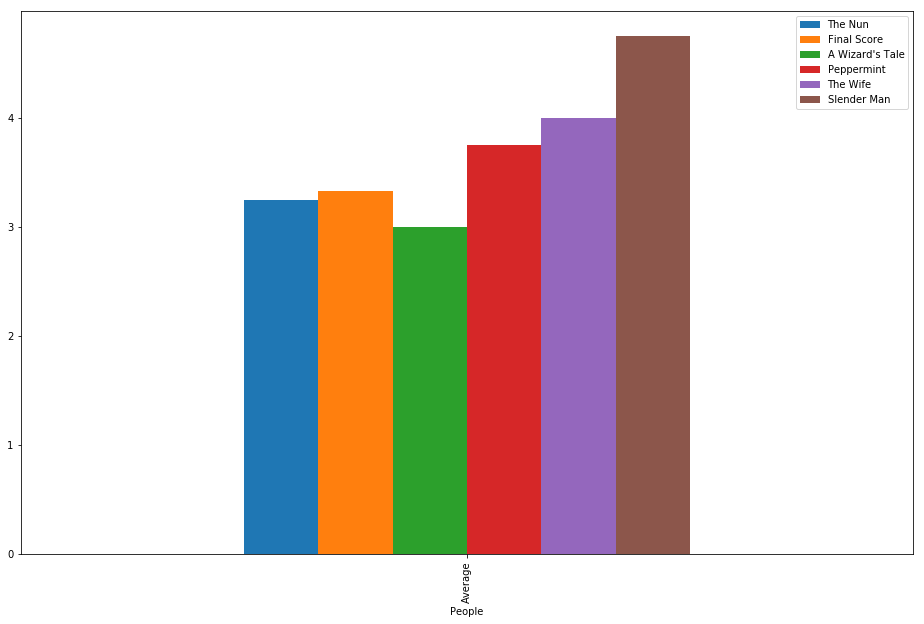

In [82]:
df1[5:].plot(kind='bar', figsize=(16, 10)) # Bar chart that shows the averages for each movie.




In [98]:
People_rating_average = df1.mean(axis=1)
People_rating_average

People
Giselle    3.800000
Trish      3.400000
Tom        4.500000
LeAnna     4.250000
Tracey     2.800000
Average    3.680556
dtype: float64

In [31]:
df2 = df1.fillna(0)

In [36]:
x = df2.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

# Sets the index and column for df_normalized to the same as df1
df_normalized.index = df1.index
df_normalized.columns = df1.columns

In [37]:
df_normalized

,The Nun,Final Score,A Wizard's Tale,Peppermint,The Wife,Slender Man
People,,,,,,
Giselle,1.0000,0.600000,0.75,1.0000,1.0,0.00
Trish,0.7500,0.400000,1.00,0.0000,0.8,0.80
Tom,1.0000,1.000000,0.00,1.0000,0.0,1.00
LeAnna,0.0000,0.000000,1.00,0.7500,1.0,1.00
Tracey,0.5000,0.000000,0.25,1.0000,0.4,1.00
Average,0.8125,0.666667,0.75,0.9375,0.8,0.95


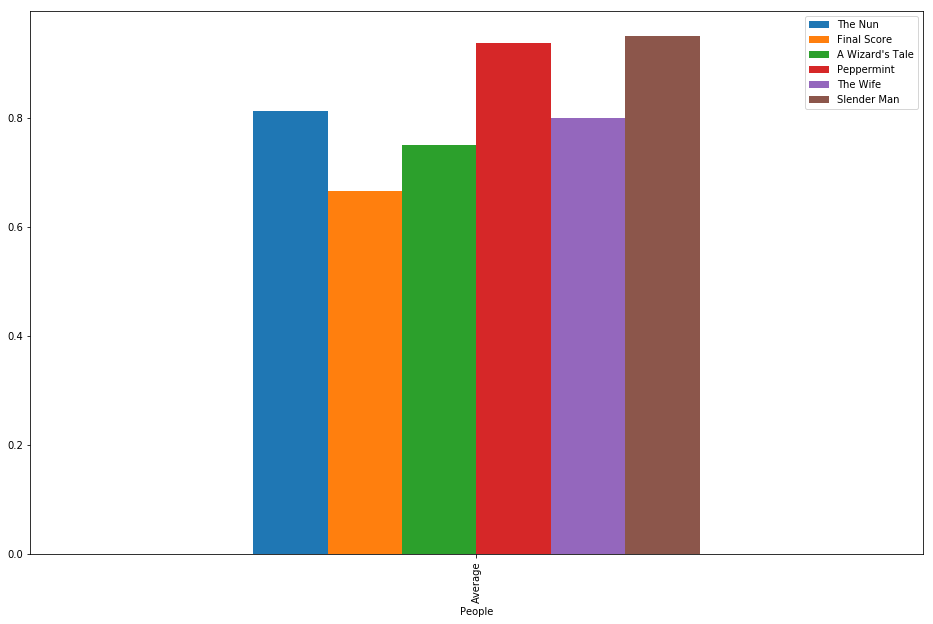

In [93]:
df_normalized[5:].plot(kind='bar', figsize=(16, 10))


In [99]:
People_rating_average_norm = df_normalized.mean(axis=1)
People_rating_average_norm

People
Giselle    0.725000
Trish      0.625000
Tom        0.666667
LeAnna     0.625000
Tracey     0.525000
Average    0.819444
dtype: float64

## Conclusion

The advantage to using normalization is that this data can be compared to other data using different scales of rating. For example, if the rating scale was 1 to 10 normalizing would allow us to compare that with the 1 to 5 ratings that were used for this data from these movie ratings.